In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, RandomizedSearchCV

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [11]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 5

In [3]:
data = pd.read_csv('parkinsons.csv')
data.drop(columns = ['name'], inplace = True)
x = data.drop(columns= ['status'])
y = data['status']
scaler  = StandardScaler()
x= scaler.fit_transform(x)
pca = PCA()
x = pca.fit_transform(x)
x=pd.DataFrame(x)

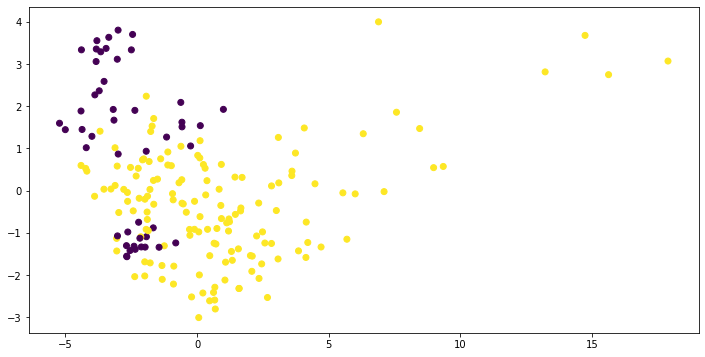

In [4]:
plt.scatter(x[0],x[1],c=y)

<BarContainer object of 22 artists>

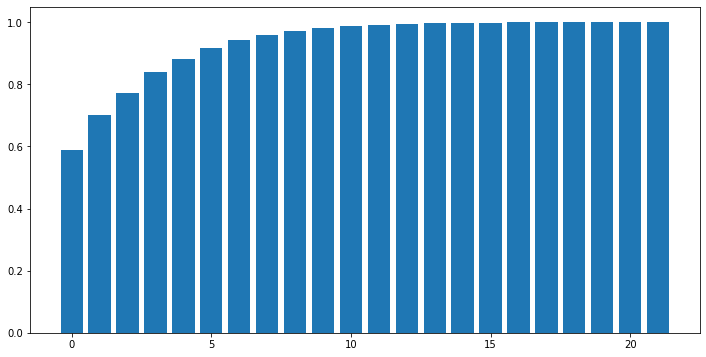

In [5]:
plt.bar(range(22), pca.explained_variance_ratio_.cumsum())

In [13]:
def visualize(x_test,y_test,classifier):
    from matplotlib.colors import ListedColormap

    x1, x2 = np.meshgrid(np.arange(start = -6,stop =18, step = 0.01),
                        np.arange(start = -3, stop = 4, step = 0.01))
    d = classifier.predict(pd.DataFrame(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape)
    plt.contourf(x1, x2, d,
                alpha= 0.75, cmap = ListedColormap(('red','green','blue')))

    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    plt.scatter(pd.DataFrame(x_test).iloc[:,0],pd.DataFrame(x_test).iloc[:,1],c=y_test)

    plt.title('Regularized XGB classifier')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.legend()
    plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x.iloc[:,[0,1]],y,test_size = 0.25, random_state = 0)

No handles with labels found to put in legend.


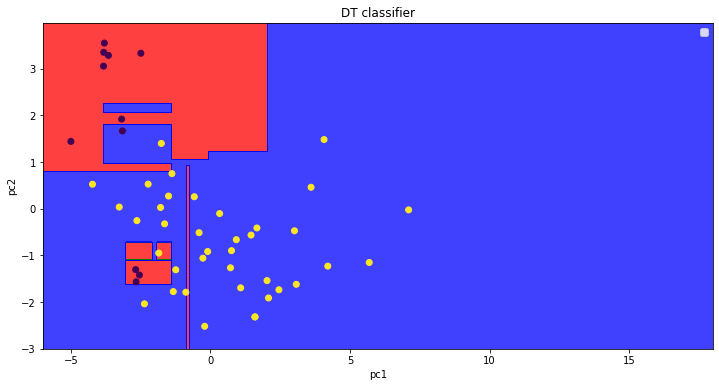

In [8]:
c1 = DecisionTreeClassifier()
c1.fit(x_train,y_train)
visualize(x_test,y_test,c1)

No handles with labels found to put in legend.


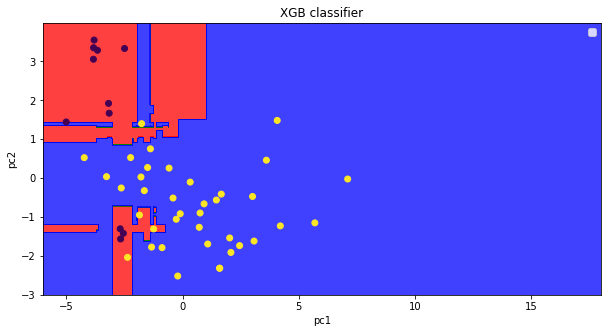

In [12]:
c2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 22)
c2.fit(x_train,y_train)
visualize(x_test.values,y_test.values,c2)

No handles with labels found to put in legend.


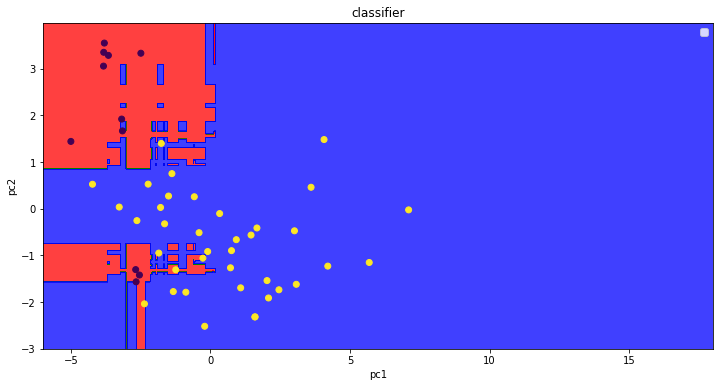

In [10]:
c3 = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 7, n_estimators = 50, reg_alpha = 0.2 ,
                       reg_lambda = 0.1, colsample_bytree = 0.5 )
c3.fit(x_train, y_train)
visualize(x_test, y_test, c3)

In [14]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
params__grid = {
    'n_estimators' : range(50,150,10),
    'max_depth': range(2, 12),
    'colsample_bytree': np.arange(0.5,1,0.1),
    'reg_alpha' : np.arange(0,0.6,0.1),
    'reg_lambda' : np.arange(0,0.8,0.1)
    

}
search = RandomizedSearchCV(estimator=clf_xgb, param_distributions=params__grid, scoring = 'accuracy',
                                cv = 4,n_iter=100 )
search.fit(x_train,y_train)

C:\Users\sameh sharawy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': range(2, 12),
       

In [15]:
search.best_params_

{'reg_lambda': 0.4,
 'reg_alpha': 0.30000000000000004,
 'n_estimators': 90,
 'max_depth': 8,
 'colsample_bytree': 0.6}

In [16]:
search.best_score_

0.8493150684931506

In [33]:
c4 = xgb.XGBClassifier(colsample_bytree=0.6,max_depth=5,n_estimators=90,
                       n_jobs=0,objective='binary:logistic', random_state=0, reg_alpha=0.7,reg_lambda=0.4)

No handles with labels found to put in legend.


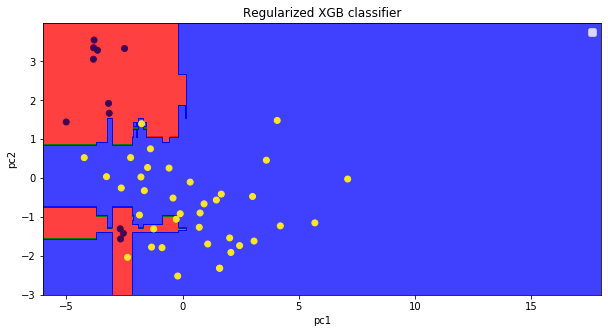

In [34]:
c4.fit(x_train,y_train)
visualize(x_test, y_test, c4)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(c4.predict(x_test),y_test)

0.9387755102040817